
## Data Generation Notebook for Experiment 2: Different Frequencies and Noise Levels

In [1]:
import numpy as np
from src.data.synthetic_dataset import SyntheticDataset
from src.visualization.visualize import InputOutputVisualization


dataset_path = "./data/test.pkl"
train_dataset_path = "./data/train.pkl"

In [2]:
dataset = SyntheticDataset.load(dataset_path)
trainset = SyntheticDataset.load(train_dataset_path)
assert 1/32 not in list(set([trainset.get_frequency(i)[0] for i in range(len(trainset))]))
assert 1/32 in list(set([dataset.get_frequency(i)[0] for i in range(len(dataset))]))

samples = []
chars = []
i = 0
for i in range(10):
    rand_idx = np.random.randint(len(dataset))
    sample = np.concatenate([dataset[rand_idx][0], dataset[rand_idx][1]])

    samples.append(sample)
    chars.append(f"Period length: {int(1 / dataset.get_frequency(rand_idx)[0])}, Delay: {dataset.get_delay(rand_idx)[0]}")

pred_starts = [dataset.sequence_length // 2,] * 16

2021-09-22 07:31:28 Mischa-PC src.data[7808] INFO Loading dataset from ./data/test.pkl
2021-09-22 07:31:28 Mischa-PC src.data[7808] INFO Loading dataset from ./data/train.pkl


2021-09-22 07:31:28 Mischa-PC src.visualization[7808] INFO using latex font


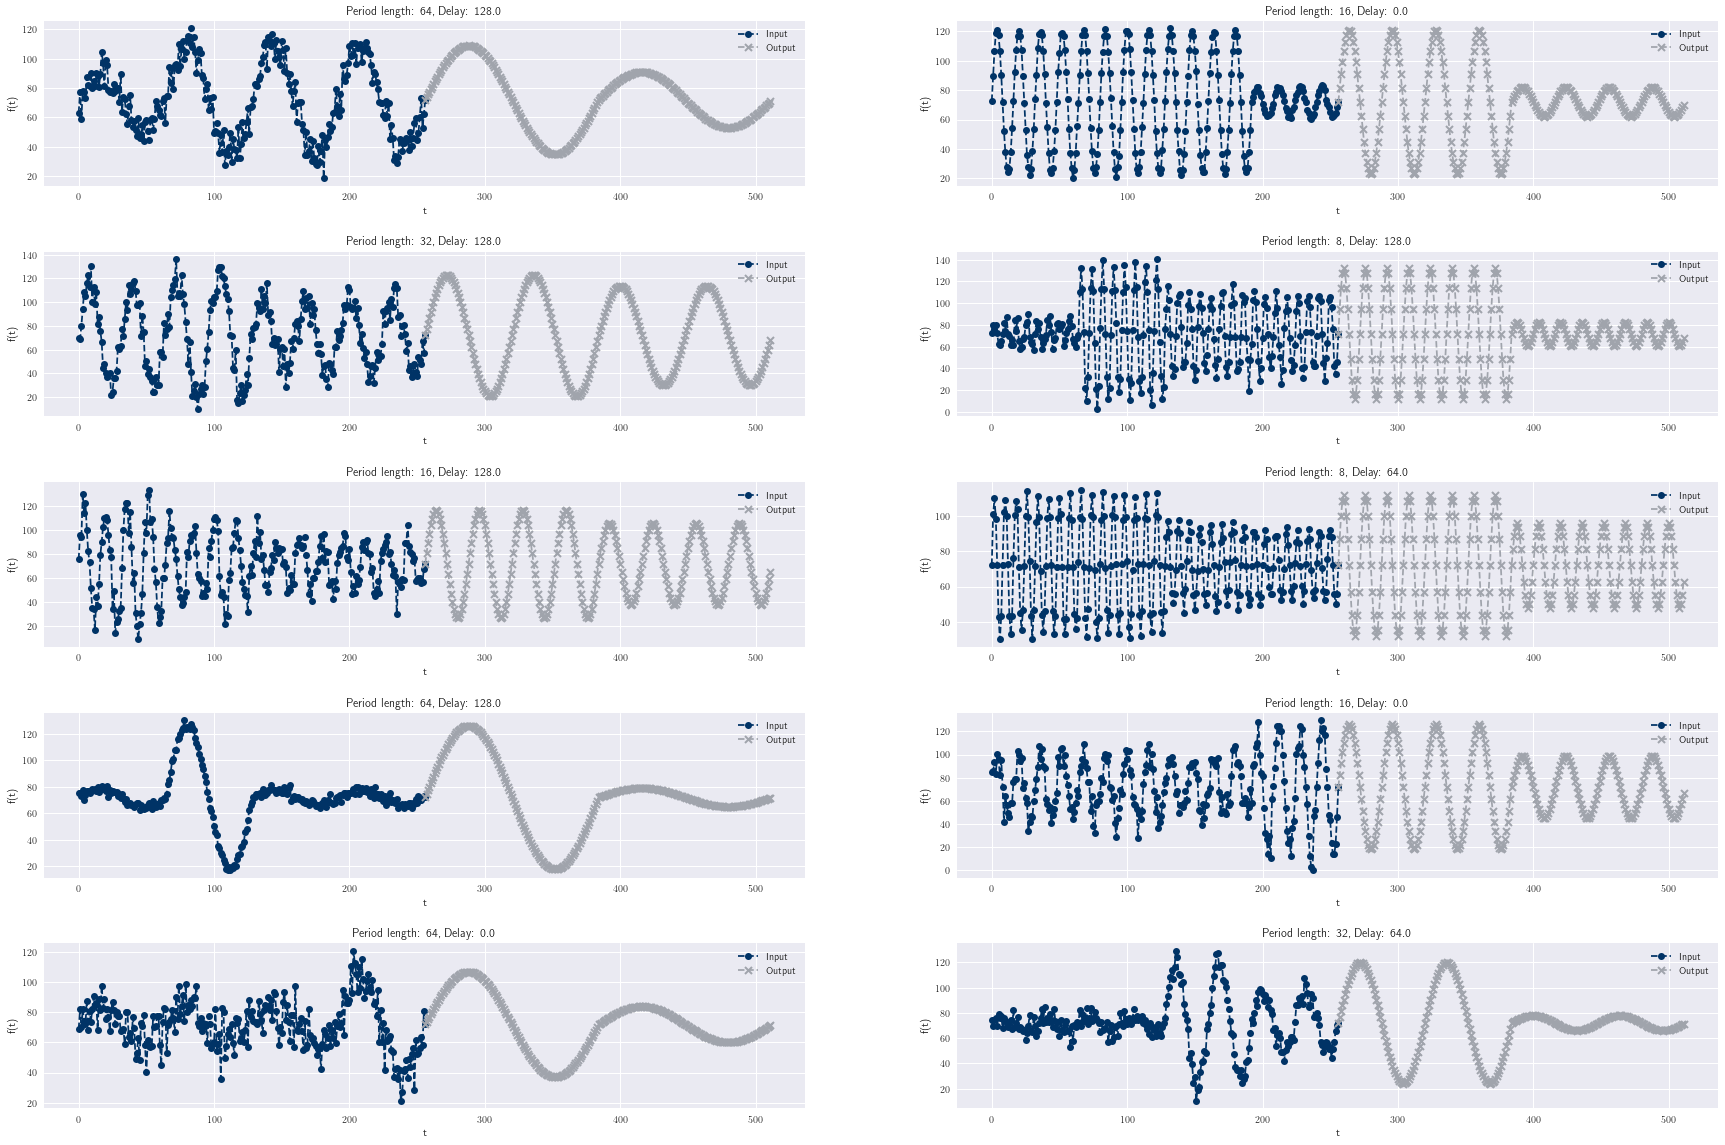

In [3]:
use_latex_font = True
viz = InputOutputVisualization(use_latex_font=use_latex_font, font_size=22)
viz.subplots(nrows=5, ncols=2, figsize=(30, 20))
viz.plot(samples, pred_starts=pred_starts)
viz.add_subplot_titles(titles=chars)
viz.add_subplot_xylabel(x_labels="t", y_labels="f(t)")
viz.adjust_bottom_margin(0.4)
viz.add_legend()
viz.save(filename="figures/different_samples")
viz.plt.show()


In [4]:
# create list with all period length that appear in the dataset
frequencies = sorted(list(set([dataset.get_frequency(i)[0] for i in range(len(dataset))])))

# print one sample of each frequency
i = 0
samples = []
chars = []
i = 0
while i < len(frequencies):
    rand_idx = np.random.randint(len(dataset))
    sample = np.concatenate([dataset[rand_idx][0], dataset[rand_idx][1]])
    if dataset.get_frequency(rand_idx)[0] != frequencies[i]:
        continue
    samples.append(sample)
    chars.append(f"Period length: {int(1 / dataset.get_frequency(rand_idx)[0])}, Delay: {dataset.get_delay(rand_idx)[0]}")
    i += 1
pred_starts = [dataset.sequence_length // 2,] * 16

2021-09-22 07:31:38 Mischa-PC src.visualization[7808] INFO using latex font
2021-09-22 07:31:38 Mischa-PC src.visualization[7808] WARNING Unexpected amount of time series for <class 'src.visualization.visualize.InputOutputVisualization'>
2021-09-22 07:31:38 Mischa-PC matplotlib.legend[7808] WARNING No handles with labels found to put in legend.


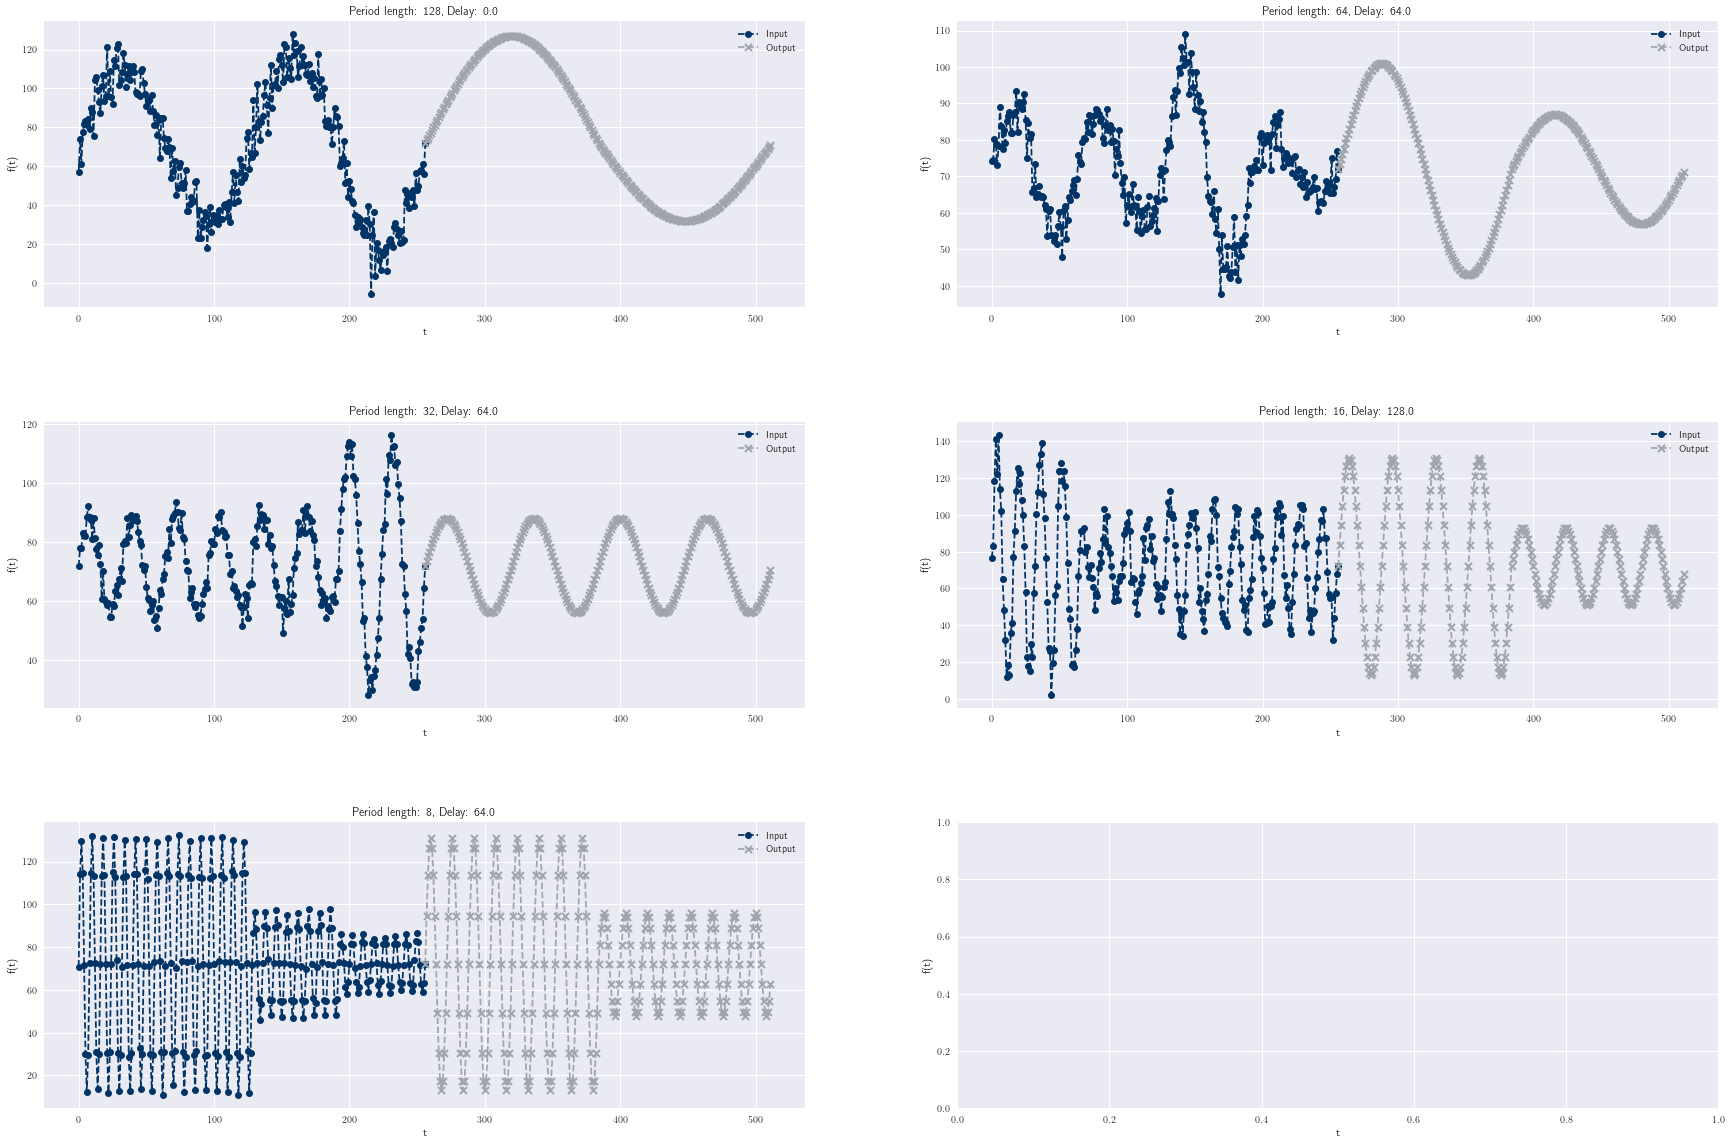

In [5]:
use_latex_font = True
viz = InputOutputVisualization(use_latex_font=use_latex_font, font_size=22)
viz.subplots(nrows=3, ncols=2, figsize=(30, 20))
viz.plot(samples, pred_starts=pred_starts)
viz.add_subplot_titles(titles=chars)
viz.add_subplot_xylabel(x_labels="t", y_labels="f(t)")
viz.adjust_bottom_margin(0.4)
viz.add_legend()
viz.save(filename="figures/different_frequencies")
viz.plt.show()
